In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

**This is a cleaned up version of the original case study, which can be found here:** 
** https://modeanalytics.com/mooseburger/reports/14cbbb5670b8 ** 
** Original Case Study at the link above contains all original SQL queries in conjunction with the Python Notebook **

Yammer’s Analysts are responsible for triaging product and business problems as they come up. In many cases, these problems surface through key metric dashboards that execs and managers check daily.

## The problem
You show up to work Tuesday morning, September 2, 2014. The head of the Product team walks over to your desk and asks you what you think about the latest activity on the user engagement dashboards. You fire them up, and something immediately jumps out:
![alt text](Yammers.png "Active Users")

The above chart shows the number of engaged users each week. Yammer defines engagement as having made some type of server call by interacting with the product (shown in the data as events of type “engagement”). Any point in this chart can be interpreted as “the number of users who logged at least one engagement event during the week starting on that date.”

You are responsible for determining what caused the dip at the end of the chart shown above and, if appropriate, recommending solutions for the problem.

### load all csv into dataframes
The CSV's are exported SQL queries preformed during the original investigation. See link above for the original queries and Case study

### yammer_case_study-events csv
All data from the events table

In [8]:
df_events = pd.read_csv('yammer_case_study-events-b22957d7edbc-2018-02-21-18-57-53.csv')
date = pd.DatetimeIndex(df_events.occurred_at).normalize()
df_events['Date'] = date

In [9]:
df_events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,Date
0,13317.0,2014-07-20 12:18:05,engagement,login,Italy,lenovo thinkpad,2.0,2014-07-20
1,13317.0,2014-07-20 12:18:13,engagement,home_page,Italy,lenovo thinkpad,2.0,2014-07-20
2,13317.0,2014-07-20 12:18:42,engagement,like_message,Italy,lenovo thinkpad,2.0,2014-07-20
3,13317.0,2014-07-20 12:19:11,engagement,home_page,Italy,lenovo thinkpad,2.0,2014-07-20
4,13317.0,2014-07-20 12:19:34,engagement,send_message,Italy,lenovo thinkpad,2.0,2014-07-20


### yammer_case_study-continents
Locations of logged events mapped to their respective continent using ** CASE, WHEN, THEN ** query

* Adds a "continent" column

In [5]:
df_continents = pd.read_csv('yammer_case_study-continents-5dee34db2fd9-2018-02-23-17-37-35.csv')
date = pd.DatetimeIndex(df_continents.occurred_at).normalize()
df_continents['Date'] = date

In [6]:
df_continents.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,continent,Date
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,Asia,2014-05-02
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,Asia,2014-05-02
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,Asia,2014-05-02
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,Asia,2014-05-02
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,Asia,2014-05-02


### yammer_case_study-device_type
specific devices mapped to their general device type (Computer, Phone, Tablet)
* Adds a "device_type" column

In [10]:
df_device = pd.read_csv('yammer_case_study-device_type-eacf6955577d-2018-02-23-04-06-26.csv')
date = pd.DatetimeIndex(df_device.occurred_at).normalize()
df_device['Date'] = date

In [11]:
df_device.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,device_type,Date
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,Computer,2014-05-02
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,Computer,2014-05-02
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,Computer,2014-05-02
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,Computer,2014-05-02
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,Computer,2014-05-02


### yammer_case_study-initial_signup_data
Filters events to event_type "signup_flow"

In [12]:
df_signup = pd.read_csv('yammer_case_study-initial_signup_data-7df1a870849b-2018-02-21-20-40-36.csv')
date = pd.DatetimeIndex(df_signup.occurred_at).normalize()
df_signup['Date'] = date

In [13]:
df_signup.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,Date
0,11768.0,2014-05-01 08:03:12,signup_flow,complete_signup,France,macbook pro,3.0,2014-05-01
1,11768.0,2014-05-01 08:01:36,signup_flow,create_user,France,macbook pro,NaN,2014-05-01
2,11768.0,2014-05-01 08:02:06,signup_flow,enter_email,France,macbook pro,NaN,2014-05-01
3,11768.0,2014-05-01 08:02:39,signup_flow,enter_info,France,macbook pro,NaN,2014-05-01
4,11769.0,2014-05-01 02:37:43,signup_flow,create_user,United Kingdom,lenovo thinkpad,NaN,2014-05-01


### Check number of daily events and confirm there was a down spike

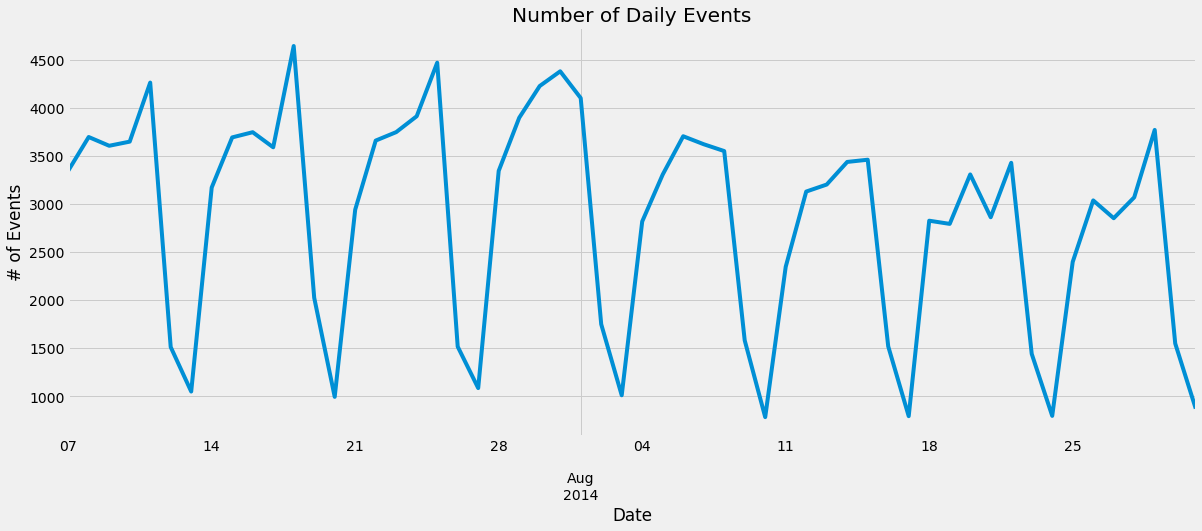

In [16]:
plotter = df_events.groupby('Date').count()
ax = plotter['device'].plot(kind = 'line', figsize = (18,7))
ax.set_xlabel('Date')
ax.set_ylabel('# of Events')
ax.set_title('Number of Daily Events')
plt.show()

## First Hypothesis:
Check the number of events by device to see if a particular device has lost support of yammer
e.g. Windows laptops can't sign in, iPhone apps not working, or Android apps not working
This would be apparent by plotting the number of events by device and checking to see if there's a significant dropoff on one ore more devices

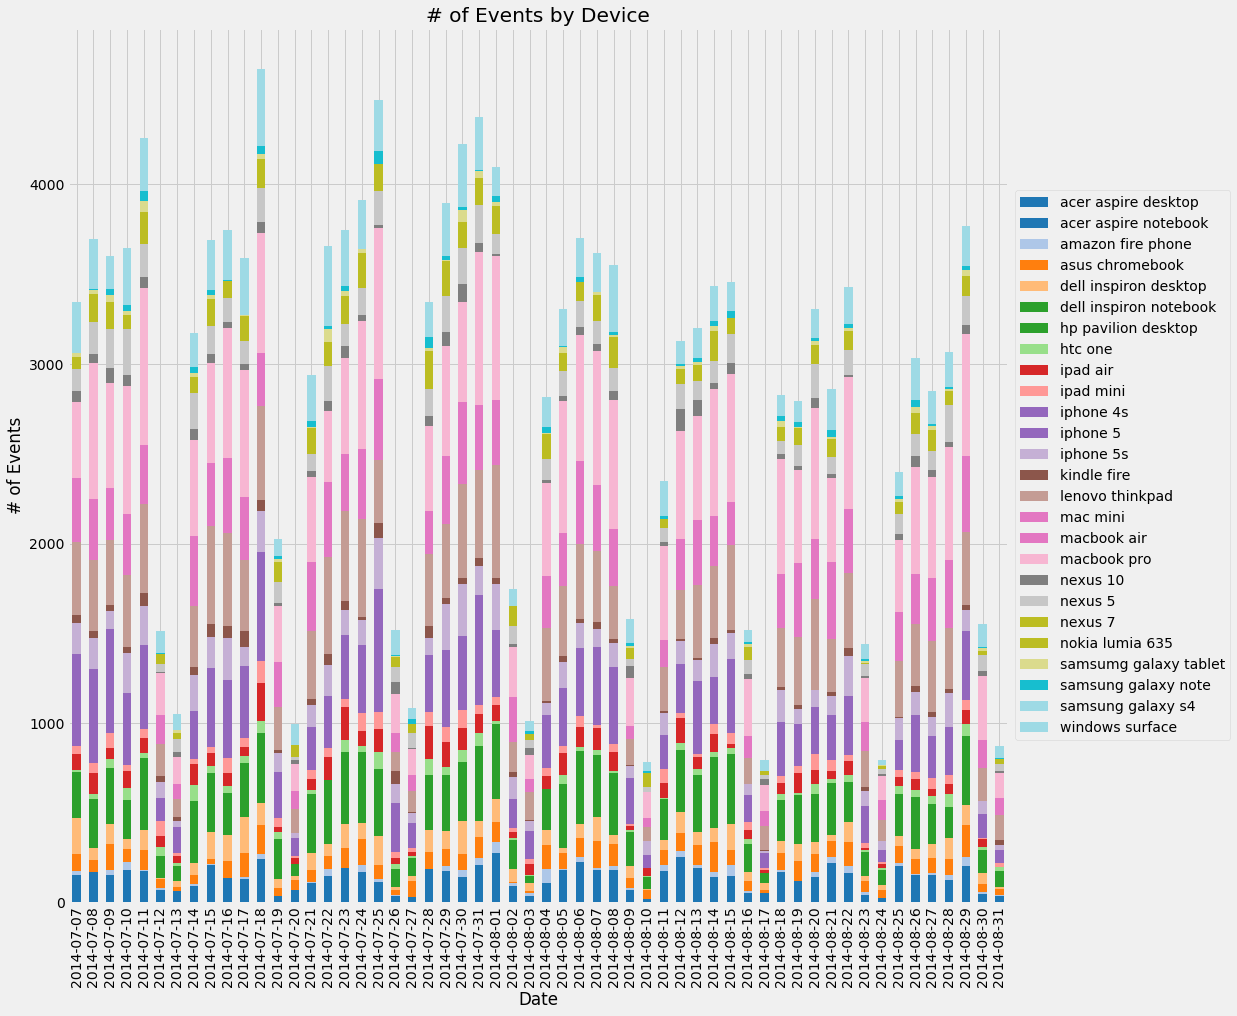

In [18]:
plotter2 = df_events.groupby(['Date','device'])['user_id'].count().unstack('device')
ax2 = plotter2.plot(kind = 'bar', stacked = True, figsize = (15,15), cmap = 'tab20', title = '# of Events by Device')
labels = [label.get_text().split()[0] for label in ax2.get_xticklabels()]
ax2.xaxis.set_ticklabels(labels)
ax2.set_ylabel('# of Events')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Result:
It's not immediately clear from the above chart if a particular device or platform has lost support. There's several device and it appears from initial looks that all devices had a dropoff in logged events

## Hypothesis #2
Maybe a particular country has lost support from the platform and users from that country are unable to login. 
Plot number of events by country and investigate

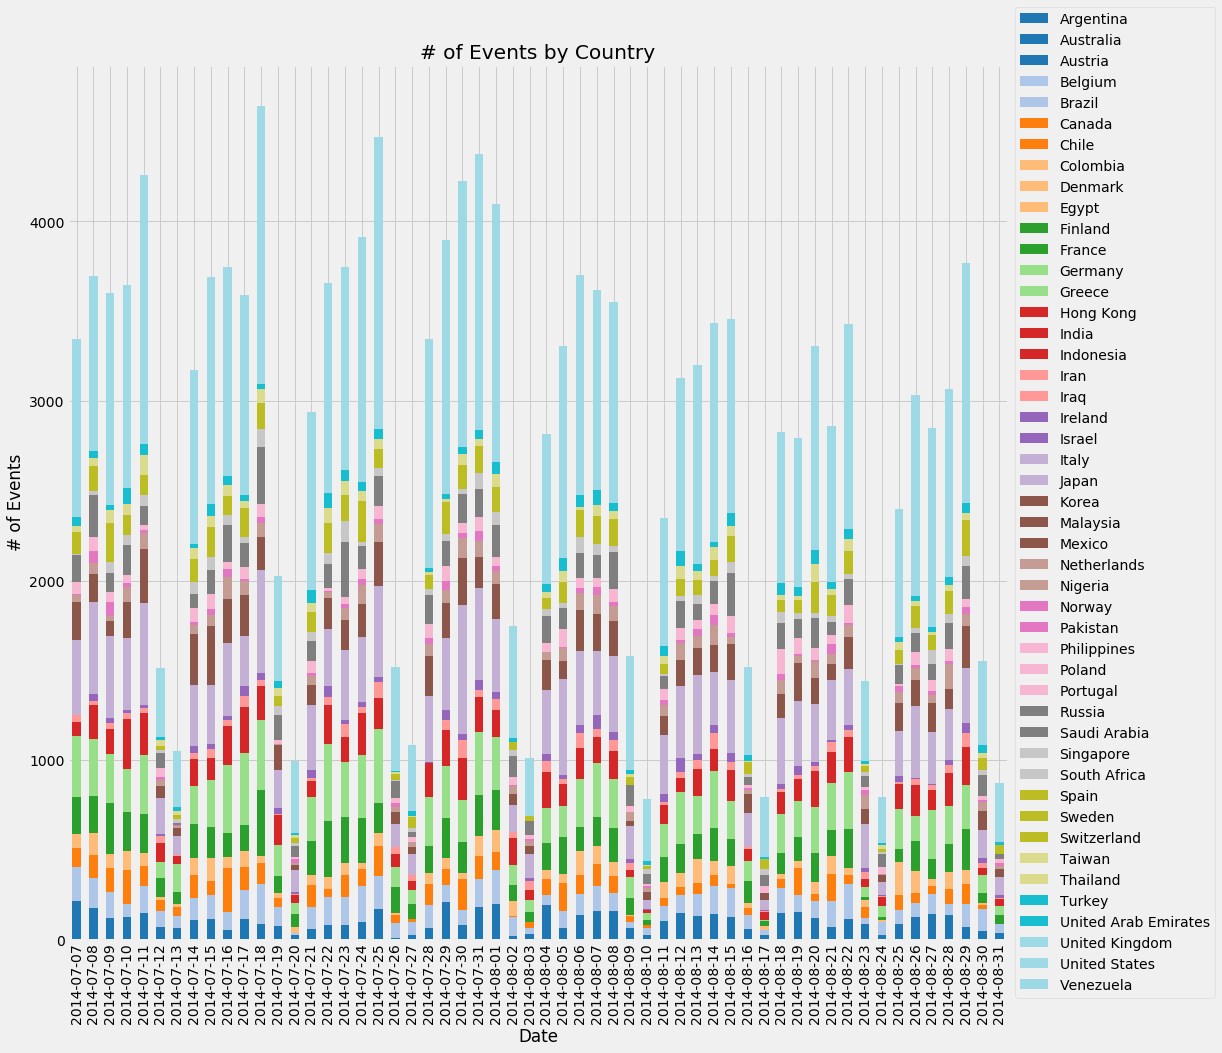

In [20]:
plotter3 = df_events.groupby(['Date','location'])['user_id'].count().unstack('location')
ax3 = plotter3.plot(kind = 'bar', stacked = True, figsize = (15,15), cmap = 'tab20')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
labels = [label.get_text().split()[0] for label in ax3.get_xticklabels()]
ax3.xaxis.set_ticklabels(labels)
ax3.set_ylabel('# of Events')
ax3.set_title('# of Events by Country')
plt.show()

## Results
As with the first hypothesis, there doesn't appear to be one particular country with a significant dropoff versus all the other countries. There seems to be a clear reduction in logged events from all countries

## Hypothesis #3
There's too much granularity in the above plot. Maybe grouping by continents will reveal more information on whether or not a particular country or countries have lost support from the platform

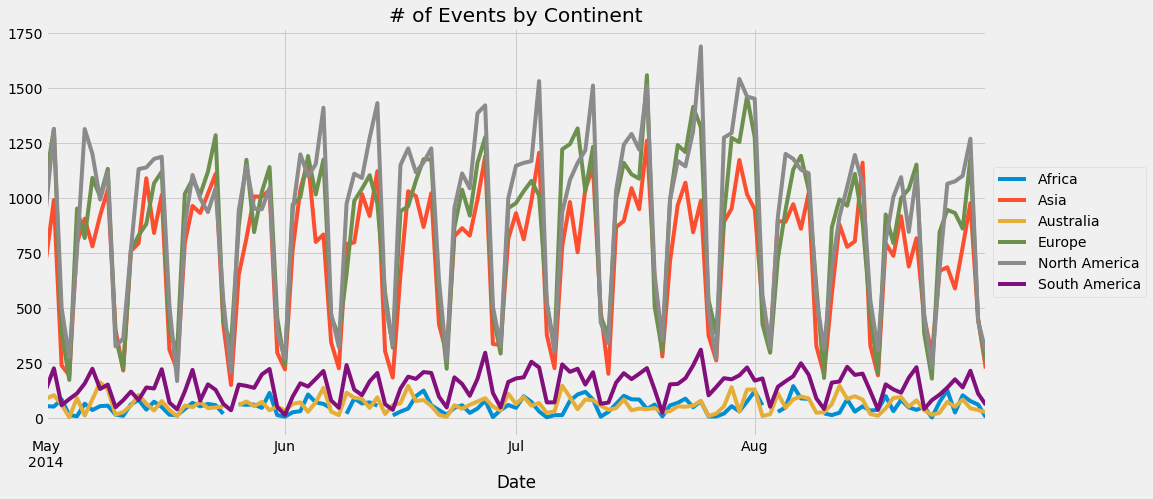

In [23]:
plotter4 = df_continents.groupby(['Date','continent'])['device'].count().unstack('continent')
ax4 = plotter4.plot(figsize = (15,7), title = '# of Events by Continent')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Result
There appaears to be a significant dropoff from the Asian Countries. There was a dropoff amongst the top 3, but Asia upon first look, appears to taken a bigger dropoff. 
It's a little hard to judge due to the dropoff in logged events every 7 days due to the weekends. We will filter out only the business days and plot those in order to smooth out the data

In [24]:
from pandas.tseries.offsets import BDay
businessday = BDay().onOffset
weekday = df_continents.Date.map(businessday)
df_continents['weekdays'] = weekday
weekday_only = df_continents[df_continents.weekdays == True]

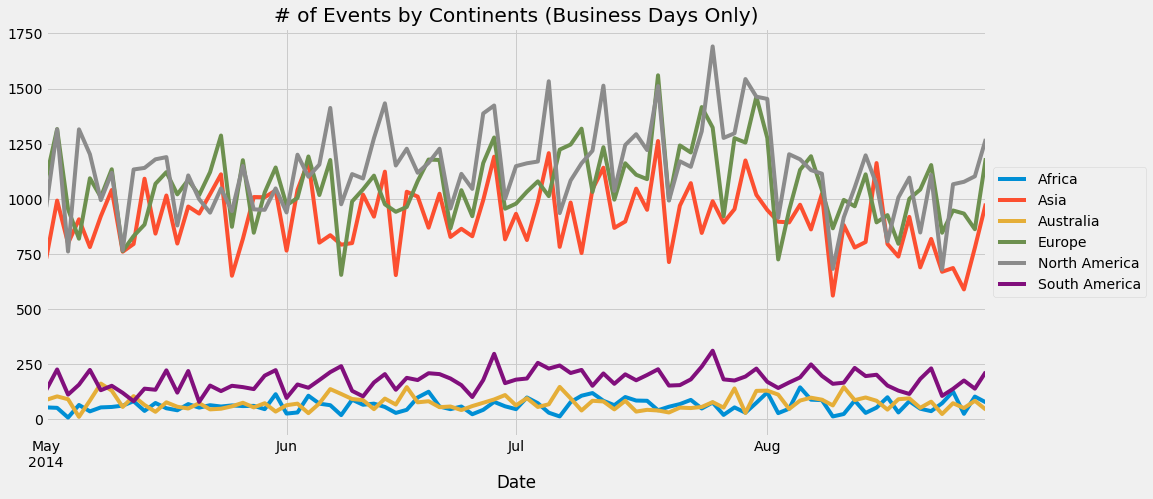

In [26]:
plotter5 = weekday_only.groupby(['Date','continent'])['user_id'].count().unstack('continent')
ax5 = plotter5.plot(figsize = (15,7), title = '# of Events by Continents (Business Days Only)')
ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Results
Afer filtering out the weekend data, it is now pretty clear that the top 3 continents did have about the same amount of dropoff in logged events. 

## Hypothesis #4
Maybe the dropoff was due to "untruthful data". It is possible that the data was inflated due to users just going through the signup process, but then never completing it or logging on again.
The best way to investigate this is to find the percentage of "Signup Events" vs all other events, and see if there was a higher percentage of "Signup Events" before the dropoff.
If this is found to be true, then we can attribute the "drop in active users" simply to a data correction.

Start off by getting an idea of how all the "Signup Events" breakdown. A signup event is 1 of 4 items
* First - Create a user
* Second - Enter email address
* Third - Enter all other user info
* Fourth - Complete Signup

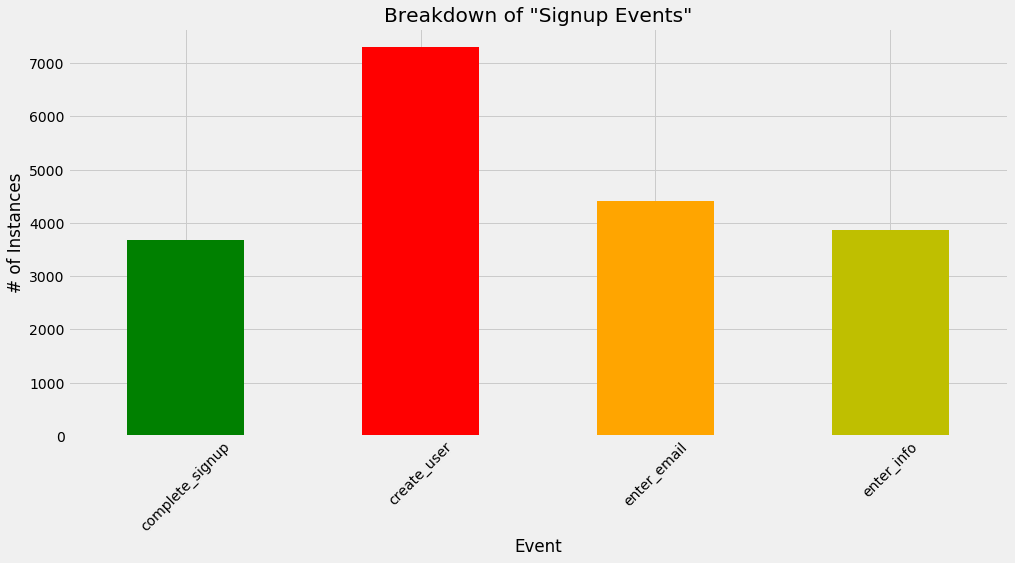

In [27]:
plotter6 = df_signup.groupby('event_name')['device'].count()
ax6 = plotter6.plot(kind = 'bar', figsize = (15,7), legend = False, rot = 45, color = ['g','r','orange','y'])
ax6.set_ylabel('# of Instances')
ax6.set_xlabel('Event')
ax6.set_title('Breakdown of "Signup Events"')
plt.show()

From above, we can see that there were over 7000 logged events of users starting the signup process (create a user). But of over those 7000 logged events, only about 3800 users completed the whole signup process.
This gives life to the current hypothesis. There was a lot of activity logged of users signing up, but a lot of those users never completed the signup process.
Next we will figure out what percentage signup events make of all logged events. If we see higher percentages before the drop, then we can attribute the drop in active users to a simple data correction

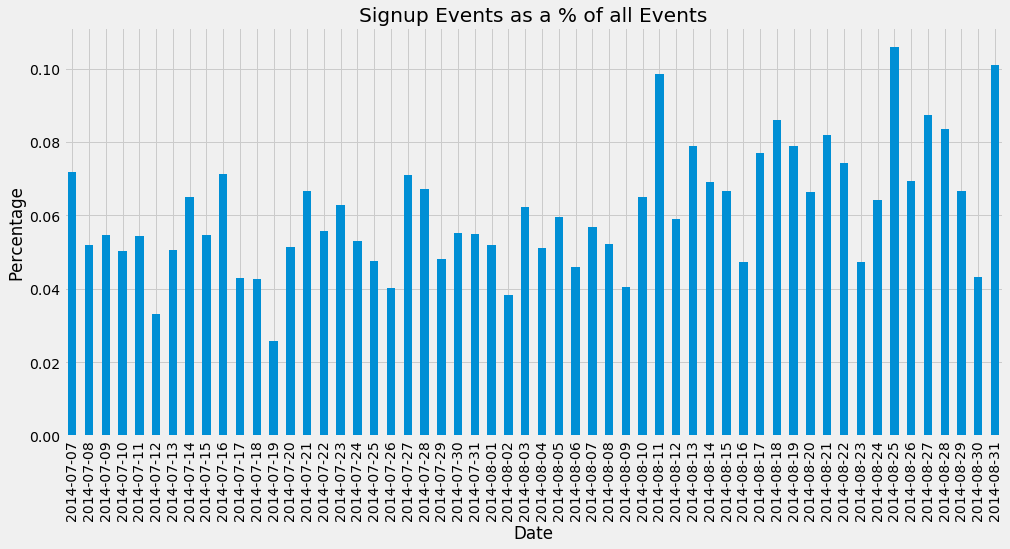

In [30]:
temp = df_events.groupby(['Date','event_name'])['device'].count().unstack('event_name')
temp['signup_event'] = temp['complete_signup']+temp['create_user']+temp['enter_email']+temp['enter_info']
temp['engagement'] = temp.iloc[:,4:].sum(axis=1)
temp['pct_of_activity'] = temp.iloc[:,-2:].signup_event.div(temp.engagement)
plotter7 = temp.pct_of_activity
ax7 = plotter7.plot(kind = 'bar', figsize = (15,7))
ax7.set_title('Signup Events as a % of all Events')
ax7.set_ylabel('Percentage')
ax7.set_xlabel('Date')
ax7.xaxis.set_ticklabels(labels)
plt.show()

## Result
It's pretty clear from the graph above that signup events actually saw an increase **AFTER** the dropoff in active users. This immediately disproves the currently hypothesis

## Hypothesis #5
Earlier we plotted the number of logged events per device, but just as was the case for the countries graph, the device graph has too much granularity in conjuction with several different device types.
Maybe grouping devices by their specific device type (Computer, Phone, Tablet) will shed more light on the issue

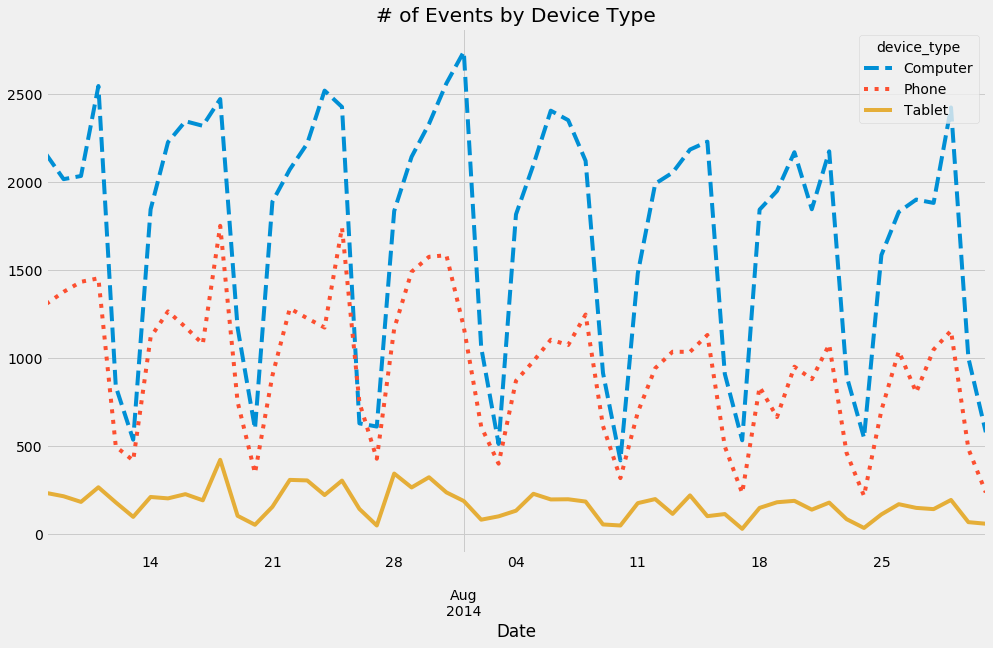

In [31]:
plotter8 = df_device.groupby(['Date','device_type'])['user_id'].count().unstack('device_type').iloc[68:]
ax8 = plotter8.plot(kind = 'line', figsize = (15,9), style = ['--',':'], title = '# of Events by Device Type')
plt.show()

## Result
There is a significant dropoff with Phones from the looks of the above graph. But again with weekends being included in the data, it is a little hard to get a clear view of how severe the downtrend is.
Remove the weekend data and plot again

In [34]:
businessday = BDay().onOffset
weekday = df_device.Date.map(businessday)
df_device['weekdays'] = weekday
weekday_only = df_device[df_device.weekdays == True]

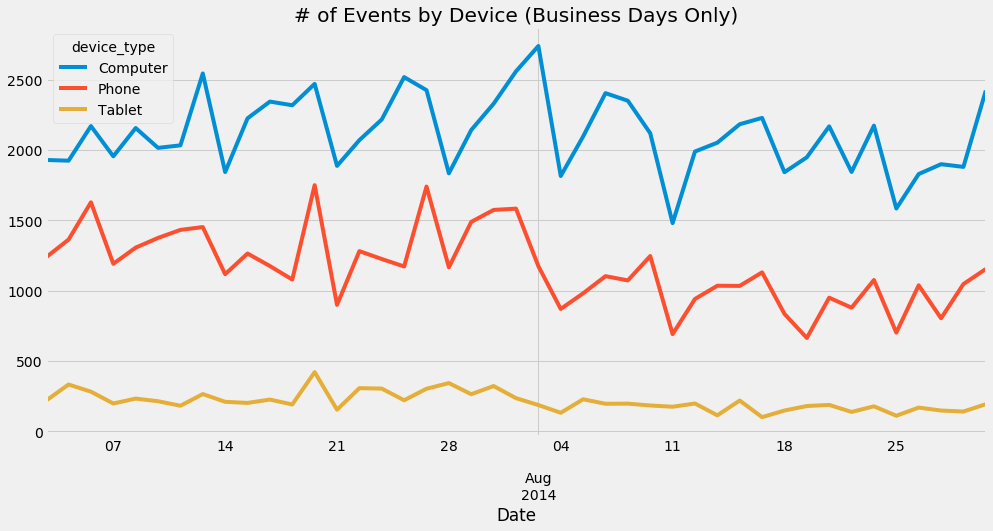

In [35]:
plotter9 = weekday_only.groupby(['Date','device_type'])['user_id'].count().unstack('device_type').iloc[-43:]
ax9 = plotter9.plot(kind = 'line', figsize = (15,7), title = '# of Events by Device (Business Days Only)')
plt.show()

## Result
Removing the weekend data does show a clear downtend, but it now doesn't look as severe as previously thought. However the data being plotted is the number of logged events per device. Maybe filtering to number of users per device will shed more light on the issue

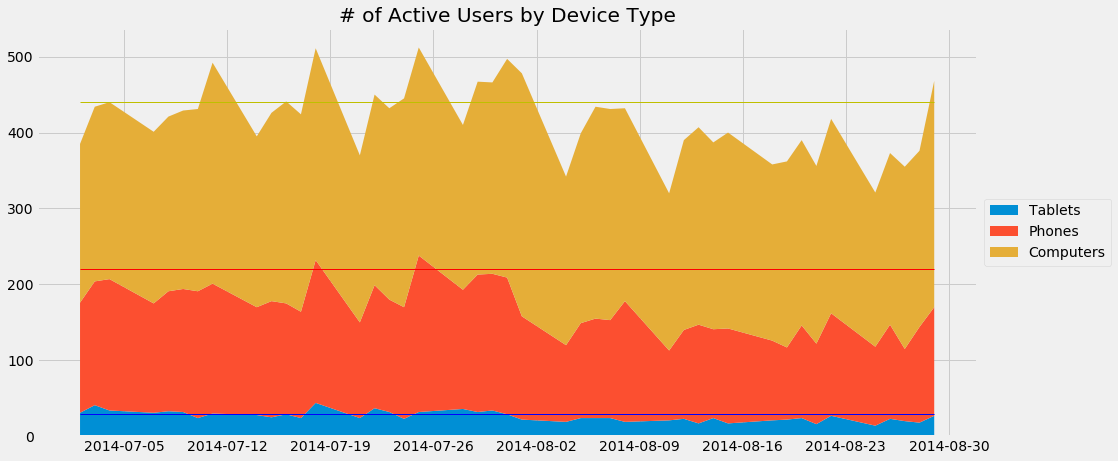

In [39]:
users_only = weekday_only.groupby(['Date','user_id','device_type'])['occurred_at'].count().unstack('device_type').applymap(lambda x: float(x)/float(x))
Computers = users_only.Computer.reset_index().groupby('Date')['Computer'].sum().iloc[-43:]
Phone = users_only.Phone.reset_index().groupby('Date')['Phone'].sum().iloc[-43:]
Tablet = users_only.Tablet.reset_index().groupby('Date')['Tablet'].sum().iloc[-43:]
fig, axes = plt.subplots(figsize = (15,7))
axes.stackplot(Computers.index[-43:], Tablet.values, Phone.values, Computers.values, labels = ['Tablets','Phones','Computers'])
axes.plot(Computers.index[-43:], [220]*len(Computers.index[-43:]), '-', c = 'r', lw = 1)
axes.plot(Computers.index[-43:], [440]*len(Computers.index[-43:]), '-', c = 'y', lw = 1)
axes.plot(Computers.index[-43:], [30]*len(Computers.index[-43:]), '-', c = 'b', lw = 1)
axes.legend()
axes.set_title('# of Active Users by Device Type')
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Success
It appears that we have found the underlying issues. When grouping the data by active users per device, there is a significant dropoff from the "Phones" users.
Clearly something is going on with the Yammer app and needs to be investigated further!